Nishant Dabur

Jaspreet

In [1]:
using LinearAlgebra
using Plots
using CSV, Statistics, LinearAlgebra
using Random,Distributions,SparseArrays,Statistics,Measures,StatsBase

# QUESTION 1

In [2]:
x = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
sigma_y = [21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22]
Ly=length(y)
Y=y
A=hcat(ones(length(x)),x)
C=zeros(Ly,Ly)
for i in 1:Ly
    C[i,i]=sigma_y[i]
end
X=(inv(A'*inv(C)*A))*(A'*inv(C)*Y)


2-element Vector{Float64}:
 33.45048482976745
  2.2213630039593824

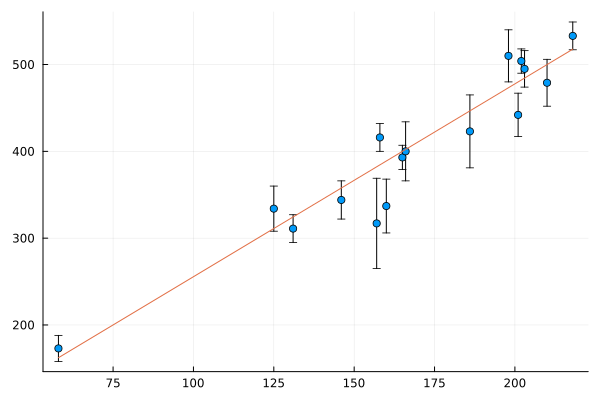

In [3]:
plot(x,Y,seriestype=:scatter,yerr = sigma_y,label="")
plot!(x, X[2]*x.+X[1],label="")

# QUESTION 2

In [4]:
x = [201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
y = [592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
sigma_y = [61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22]
Ly=length(y)
Y=y
A=hcat(ones(length(x)),x)
C=zeros(Ly,Ly)
for i in 1:Ly
    C[i,i]=sigma_y[i]
end
X=(inv(A'*inv(C)*A))*(A'*inv(C)*Y)

2-element Vector{Float64}:
 252.472028522875
   0.8965818959896836

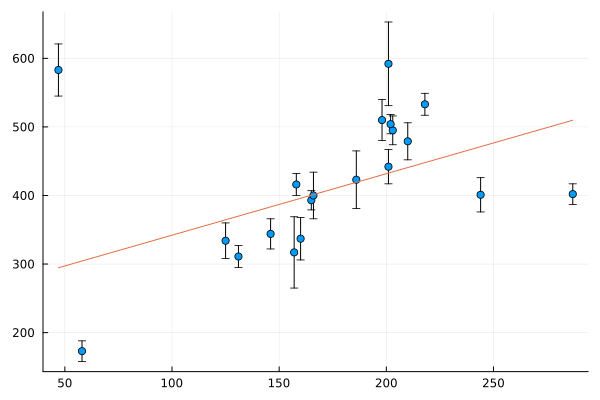

In [5]:
plot(x,Y,seriestype=:scatter,yerr = sigma_y,label="")
plot!(x, X[2]*x.+X[1],label="")

# QUESTTION 3

In [6]:
x = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
sigma_y =[21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22]
xsq = x.^2
A = hcat(ones(length(x)),x,xsq)
N = length(sigma_y)
C = diagm(N,N, 0 => sigma_y)
X = inv(A'*inv(C)*A)*(A'*inv(C)*Y)

3-element Vector{Float64}:
 81.92857798188925
  1.4469035120977196
  0.002719821530298372

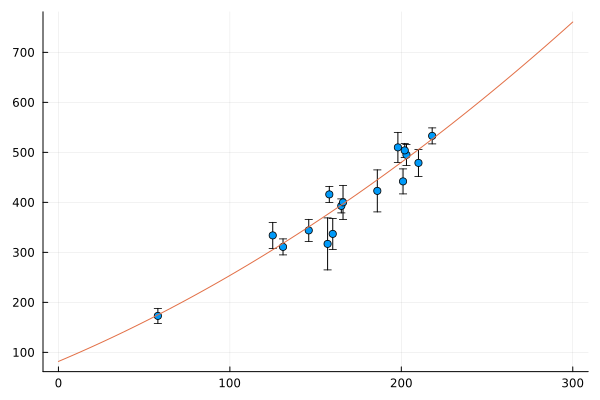

In [7]:
plot(x,Y,seriestype=:scatter,yerr =sigma_y,label="")
x=0:1:300
plot!(x,X[3]*x.^2 .+X[2]*x .+X[1],label="")


# QUESTION 4

The probability distribution for $t_i$ is
$$ p(t_i | \sigma_{ti}, T) = \frac{1}{\sqrt{2\pi\sigma_{ti}^2}} \exp\left( -\frac{[t_i - T]^2}{2\sigma_{ti}^2} \right). $$
Thus the likelihood is given by 
$$ \mathcal{L} = \prod_{i=1}^N p(t_i | \sigma_{ti}, T), $$
Now after taking logarithm, we have
$$ \ln \mathcal{L} = K - \sum_{i=1}^N \frac{[t_i - T]^2}{2\sigma_{ti}^2}. $$
where K is a constant.

For this to be maximum, its derivative with respect to $T$ should be zero:
$$ 0 = \frac{d}{dT} \ln \mathcal{L} = \sum_{i=1}^N \frac{[t_i - T]}{\sigma_{ti}^2}. $$

Therefore maximum log likelihood is obtained when:
$$ T = \frac{\sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2}}{\sum_{i=1}^N \frac{1}{\sigma_{ti}^2}}, $$
which is also the expression for the weighted mean.

# QUESTION 5


We have $\chi^2$ as
$$ \chi^2 = [\mathbf{Y} - \mathbf{A} \mathbf{X}]^T \mathbf{C}^{-1} [\mathbf{Y} - \mathbf{A} \mathbf{X}] $$
Taking derivative with respect to $\mathbf{X}$ gives
$$ 0 = \frac{d}{d\mathbf{X}} \chi^2 = -\mathbf{A}^T \mathbf{C}^{-1} [\mathbf{Y} - \mathbf{A} \mathbf{X}] -  [\mathbf{Y} - \mathbf{A} \mathbf{X}]^T \mathbf{C}^{-1} \mathbf{A} $$
or
$$ \mathbf{A}^T \mathbf{C}^{-1} \mathbf{A} \mathbf{X} = \mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y} $$
Solving for $X$ we get
$$ \mathbf{X} = [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{A}]^{-1} [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y}] $$
which is the desired expression.

# QUESTION 6

In [8]:
X = [201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
σy =[61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22];
A = hcat(ones(length(X)),X)
N = length(σy)
C = diagm(N,N, 0 => σy.^2)
bestfit = inv(A'*inv(C)*A)*(A'*inv(C)*Y) 

2-element Vector{Float64}:
 213.27349197595913
   1.0767475241683293

MAP Line
m = 2.23, b = 36.0


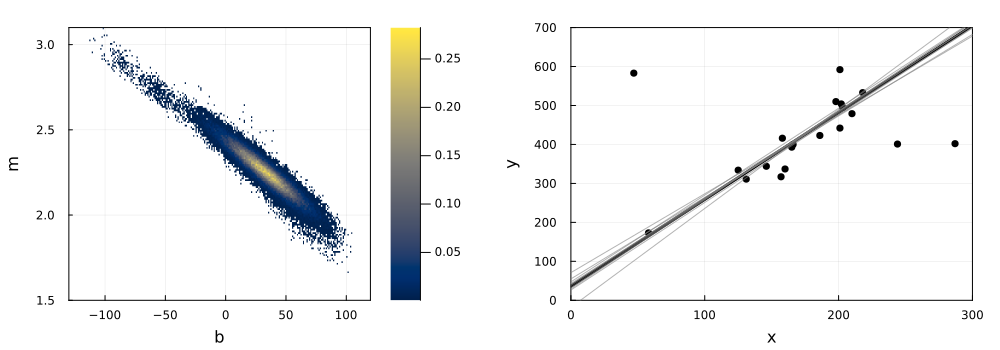

In [9]:
function objective(pars,X,Y,σy)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*σy[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/σy[i]^2)+Pb/sqrt(2*pi*(Vb+σy[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+σy[i]^2))) for i in 1:length(X))#+pars[4]
end
function metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
initialX = objective(initial_guess,X,Y,σy)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)
    parsigma=[5,0.075,0.01,1,0.1]   
    for i in 1:(nburn+nsample)
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        newX = objective(newsample,X,Y,σy)
        u = rand()
        try
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    return bestfit, accepted_samples
end
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])
nsample = 2E5  
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("MAP Line")
println("m = ",bestm,", b = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:cividis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)
plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,σy=σy,mc=:black)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)


# QUESTION 7

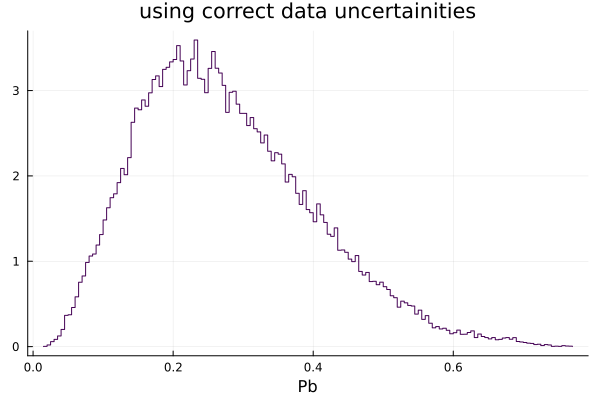

In [10]:
histPb = stephist(accepted_Pb, nbins=200,c=:viridis,legend=false,density = true,normalize=:pdf)
histogram(histPb,xlabel="Pb", title = "using correct data uncertainities")


In [11]:
X = [201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]./2
σy =[61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22];
A = hcat(ones(length(X)),X)
N = length(σy)
C = diagm(N,N, 0 => σy.^2 ./4)
bestfit = inv(A'*inv(C)*A)*(A'*inv(C)*Y) 

2-element Vector{Float64}:
 106.63674598797957
   0.5383737620841647

MAP Line
m = 1.13, b = 17.0


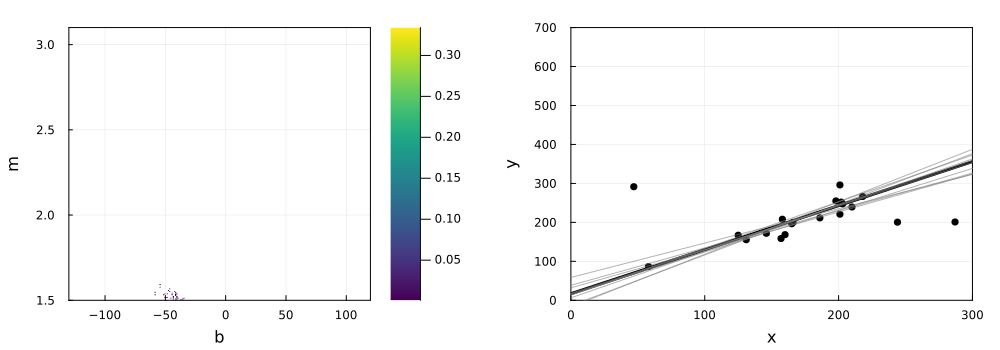

In [12]:
function objective(pars,X,Y,σy)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*σy[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/σy[i]^2)+Pb/sqrt(2*pi*(Vb+σy[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+σy[i]^2))) for i in 1:length(X))#+pars[4]
end
function metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
initialX = objective(initial_guess,X,Y,σy)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)
    parsigma=[5,0.075,0.01,1,0.1]   
    for i in 1:(nburn+nsample)
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        newX = objective(newsample,X,Y,σy)
        u = rand()
        try
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    return bestfit, accepted_samples
end
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])
nsample = 2E5  
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("MAP Line")
println("m = ",bestm,", b = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,σy=σy,mc=:black)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)


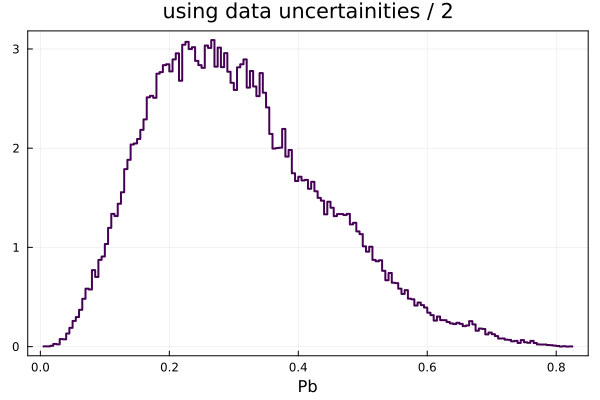

In [13]:
histPb = stephist(accepted_Pb, nbins=bins,lw=2,c=:viridis,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using data uncertainities / 2",framestyle=:box)

# QUESTION 8

In [14]:
using Pandas
function standard_fit(data)
    x = Array(data.x)
    Y = Array(data.y)
    sig_y = Array(data.sig_y)
    A = hcat(ones(length(Y)), x)
    C = Diagonal(sig_y .^ 2)
    X = inv(A' * inv(C) * A) * (A' * inv(C) * Y)
    slope = X[2]
    intercept = X[1]
    slope_uncertainty = sqrt(inv(A' * inv(C) * A)[2, 2])
    intercept_uncertainty = sqrt(inv(A' * inv(C) * A)[1, 1])
    return slope, slope_uncertainty, intercept, intercept_uncertainty
end
data = read_csv("Data.csv")
M = 20000
N = length(data.x)
m_org = standard_fit(data)[1]
m_vals = []
for i in 1:M
    sample_with_replacement = Pandas.sample(data, N, replace=true)
    m_curr = standard_fit(sample_with_replacement)[1]
    push!(m_vals, m_curr)
end
sigma_m_bootstrap = sum((m_vals .- m_org).^2) / (M)
println("Standard estimate of uncertainty: ", standard_fit(data)[2])
println("Bootstrap estimate of uncertainty: ", sigma_m_bootstrap)
m_vals = []
for i in 1:N
    sample_without_i = Pandas.sample(data, N, replace=true, ignore_index=i)
    m_curr = standard_fit(sample_without_i)[1]
    push!(m_vals, m_curr)
end
sigma_m_jackknife = (N - 1) * sum((m_vals .- m_org).^2) / N
println("Jackknife estimate of uncertainty: ", sigma_m_jackknife)


Standard estimate of uncertainty: 0.0774067831657561
Bootstrap estimate of uncertainty: 0.3813112746703703


Jackknife estimate of uncertainty: 6.046767393504046


# QUESTION 9

With all inlier points

In [15]:
X = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
σy =[21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22];
A = hcat(ones(length(X)),X)
N = length(σy)
C = diagm(N,N, 0 => σy.^2)
bestfit = inv(A'*inv(C)*A)*(A'*inv(C)*Y) 

2-element Vector{Float64}:
 34.047727757542816
  2.239920831631096

MAP Line
m = 2.24, b = 32.0


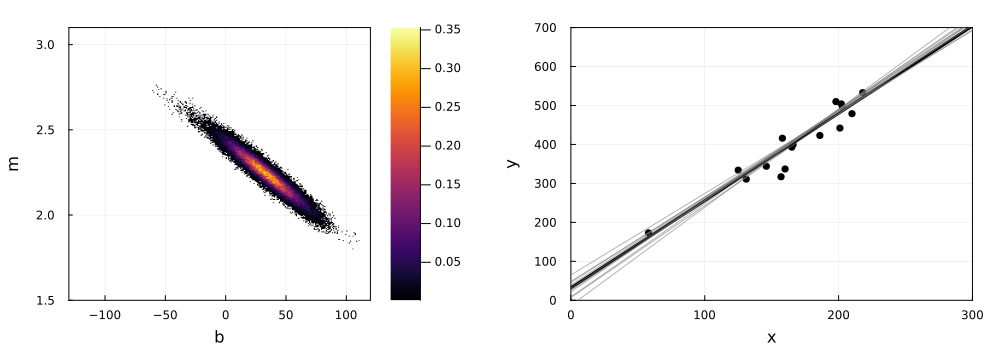

In [16]:
function objective(pars,X,Y,σy)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*σy[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/σy[i]^2)+Pb/sqrt(2*pi*(Vb+σy[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+σy[i]^2))) for i in 1:length(X))#+pars[4]
end
function metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
initialX = objective(initial_guess,X,Y,σy)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)
    parsigma=[5,0.075,0.01,1,0.1]   
    for i in 1:(nburn+nsample)
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        newX = objective(newsample,X,Y,σy)
        u = rand()
        try
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    return bestfit, accepted_samples
end
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])
nsample = 2E5  
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("MAP Line")
println("m = ",bestm,", b = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:inferno, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)
plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,σy=σy,mc=:black)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)


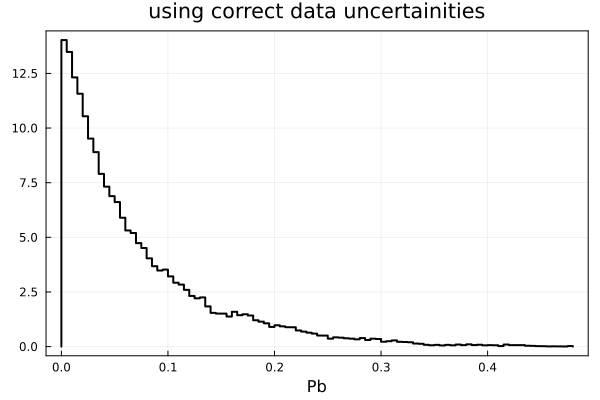

In [17]:
histPb = stephist(accepted_Pb, nbins=200,lw=2,c=:black,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using correct data uncertainities",framestyle=:box)

Inlier points and data uncertainties reduced by 2

In [18]:
X = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344] ./2
σy =[21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22];
A = hcat(ones(length(X)),X)
N = length(σy)
C = diagm(N,N, 0 => σy.^2 ./4)
bestfit = inv(A'*inv(C)*A)*(A'*inv(C)*Y)

2-element Vector{Float64}:
 17.023863878771408
  1.119960415815548

MAP Line
m = 1.14, b = 12.0


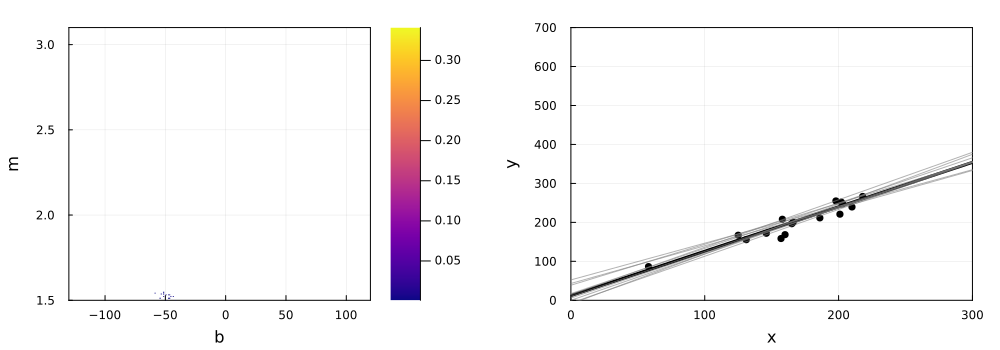

In [19]:
function objective(pars,X,Y,σy)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*σy[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/σy[i]^2)+Pb/sqrt(2*pi*(Vb+σy[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+σy[i]^2))) for i in 1:length(X))#+pars[4]
end
function metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
initialX = objective(initial_guess,X,Y,σy)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)
    parsigma=[5,0.075,0.01,1,0.1]   
    for i in 1:(nburn+nsample)
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        newX = objective(newsample,X,Y,σy)
        u = rand()
        try
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    return bestfit, accepted_samples
end
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])
nsample = 2E5 
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("MAP Line")
println("m = ",bestm,", b = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:plasma, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)
plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,σy=σy,mc=:black)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)


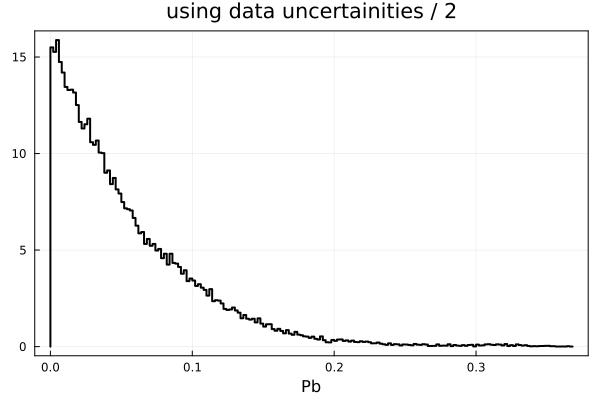

In [20]:
histPb = stephist(accepted_Pb, nbins=bins,lw=2,c=:black,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using data uncertainities / 2",framestyle=:box)

 # Question 10

In [21]:
X = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
σy =[21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22]
A = hcat(ones(length(X)),X)
N = length(σy)
C = diagm(N,N, 0 => σy.^2 )
X = inv(A'*inv(C)*A)*(A'*inv(C)*Y) 
χ2=(Y-A*X)'*inv(C)*(Y-A*X)



18.68076991124081

In [22]:
X = [201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
σy =[61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22]
plot(x,Y,seriestype=:scatter,label="data")
A = hcat(ones(length(X)),X)
N = length(σy)
C = diagm(N,N, 0 => σy.^2 )
X = inv(A'*inv(C)*A)*(A'*inv(C)*Y) 
χ2=(Y-A*X)'*inv(C)*(Y-A*X)
print("\nThe Chi^2 for exercise 2 :",χ2)


The Chi^2 for exercise 2 :289.96372278199925

# QUESTION 11

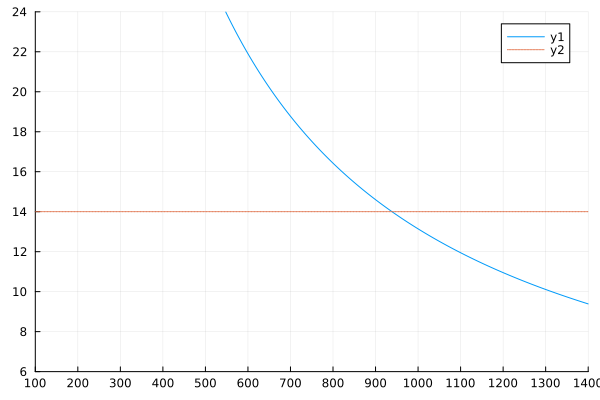


S for which Chi-squared is nearest to 14.0 : 939.3393393393394
The mean of uncertainty variance :739.0625
The median of uncertainty variance :554.5


In [23]:
function Chi_sq(S,X,Y)
N = length(X)
sigma_y= S*ones(N)
A = hcat(ones(length(X)),X)
C = diagm(N,N, 0 => sigma_y )
X = inv(A'*inv(C)*A)*(A'*inv(C)*Y) 
χ2=(Y-A*X)'*inv(C)*(Y-A*X)
return χ2
end
X = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
sigma_y2 =sort([21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22] .^2)
median_value =0.5*(sigma_y2[8]+sigma_y2[9])
mean_value =sum(sigma_y2)/16
N=1000
S_vals=LinRange(100,1400,N)
Chi_vals=zeros(N)
for i=1:N
S=S_vals[i]
Chi_vals[i]=Chi_sq(S,X,Y)
end
p=plot(S_vals,Chi_vals,ylim=(6,24),yticks=collect(6:2:24),xlim=(100,1400),xticks=collect(100:100:1400))
plot!(p,S_vals,ones(N)*14,linestyle=:dot)
display(p)
print("\nS for which Chi-squared is nearest to 14.0 : ")
S_near= argmin( abs.(Chi_vals .- 14)) 
println(S_vals[S_near])
println("The mean of uncertainty variance :",mean_value)
println("The median of uncertainty variance :",median_value)